# 人工神经网络

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# 用于在jupyter中进行绘图
%matplotlib inline

## ANN建模

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()

# 将不是apple的标签设为0
y[y != 1] = 0
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

### 1. 单层ANN

神经元个数=1，准确率：0.600


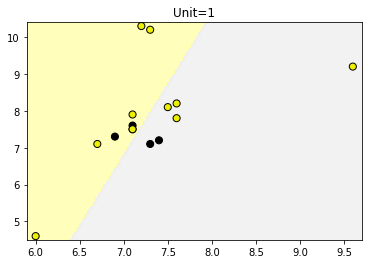

神经元个数=10，准确率：0.800


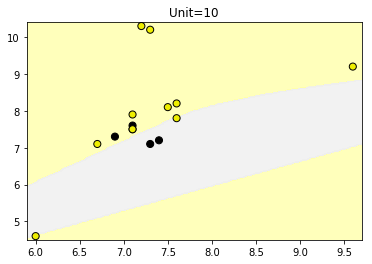

神经元个数=100，准确率：0.667


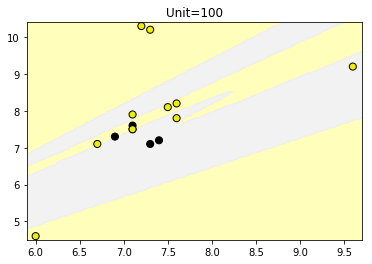

In [3]:
from sklearn.neural_network import MLPClassifier
from ml_visualization import plot_class_regions_for_classifier

# 神经元个数
units = [1, 10, 100]

for unit in units:
    # 激活函数：relu, logistic, tanh
    # 优化算法：lbfgs, sgd, adam。adam适用于较大的数据集，lbfgs适用于较小的数据集。
    ann_model = MLPClassifier(hidden_layer_sizes=[unit], activation='logistic', solver='lbfgs', random_state=0)
    ann_model.fit(X_train, y_train)
    print('神经元个数={}，准确率：{:.3f}'.format(unit, ann_model.score(X_test, y_test)))
    plot_class_regions_for_classifier(ann_model, X_test.values, y_test.values, title='Unit={}'.format(unit))

### 2. 多层ANN

准确率：0.800


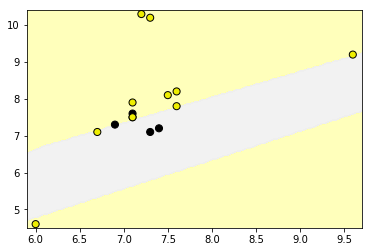

In [4]:
ann_model = MLPClassifier(hidden_layer_sizes=[10, 10], activation='relu', solver='lbfgs', random_state=0)
ann_model.fit(X_train, y_train)
print('准确率：{:.3f}'.format(ann_model.score(X_test, y_test)))
plot_class_regions_for_classifier(ann_model, X_test.values, y_test.values)

### 3. ANN中的正则化

alpha=0.001，准确率：0.800


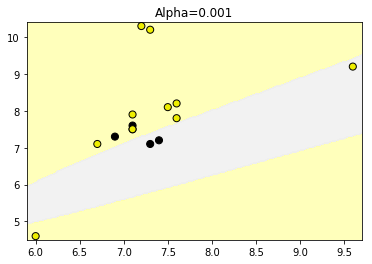

alpha=0.01，准确率：0.867


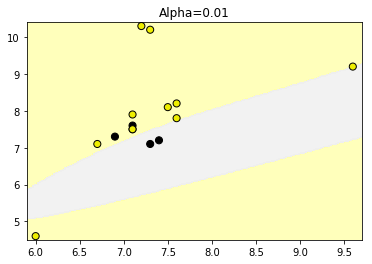

alpha=0.1，准确率：0.733


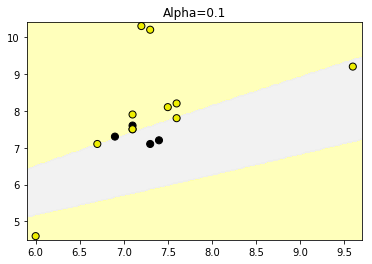

alpha=1.0，准确率：0.733


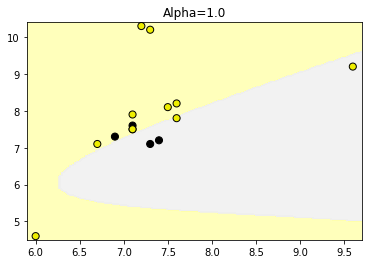

In [5]:
# alpha
aplhas = [0.001, 0.01, 0.1, 1.0]
for alpha in aplhas:
    ann_model = MLPClassifier(hidden_layer_sizes=[100, 100], activation='tanh', solver='lbfgs', random_state=0,
                             alpha=alpha)
    ann_model.fit(X_train, y_train)
    print('alpha={}，准确率：{:.3f}'.format(alpha, ann_model.score(X_test, y_test)))
    plot_class_regions_for_classifier(ann_model, X_test.values, y_test.values, title='Alpha={}'.format(alpha))